# Machine learning 23 : Support Vactor Machine - Classification
Support Vector Machine (SVM) is a powerful and versatile supervised machine learning algorithm used primarily for **classification**, though it can also handle **regression** tasks. Here's a breakdown to help you get a solid grasp:

### **1. What is SVM?**

Support Vector Machine is a **supervised machine learning algorithm** used for:

* **Classification** (most common)
* **Regression** (called SVR)

The main idea:

> SVM tries to **find the best line (in 2D)** or **hyperplane (in higher dimensions)** that separates different classes of data **with the largest possible margin**.

### **2. Key Idea**

Imagine you have two types of points: **red** and **blue**.
There could be many lines that separate them, but SVM chooses the **line that is farthest away from the nearest points of both classes**.

* These nearest points are called **Support Vectors**.
* The gap between them is called the **Margin**.
* SVM aims to **maximize this margin** for better generalization.

### 3. Types of SVM
1. **Linear SVM** – Works when data can be separated by a straight line/hyperplane.
2. **Non-linear SVM** – Uses **kernel functions** to transform the data into a higher dimension so that it becomes linearly separable.
### 4. How It Works
- In a 2D space, the hyperplane is a line. In higher dimensions, it becomes a plane or a hyperplane.
- For **linearly separable data**, SVM finds a straight boundary.
- For **non-linearly separable data**, SVM uses **kernel functions** to project data into higher dimensions where it becomes linearly separable.

### 5. Types of Kernels
- **Linear Kernel**: Best for linearly separable data.
- **Polynomial Kernel**: Captures more complex relationships.
- **Radial Basis Function (RBF)**: Great for non-linear data.
- **Sigmoid Kernel**: Similar to neural networks.

### 6. Applications
- **Face detection**
- **Text categorization**
- **Image classification**
- **Bioinformatics** (e.g., cancer classification)

### 7. Multi-Class Classification
SVM is inherently binary, but for multi-class problems, it uses strategies like:
- **One-vs-One**
- **One-vs-Rest**


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# 1. Load & preprocess Titanic data
df = pd.read_csv('Social_Network_Ads.csv')[['Age','EstimatedSalary','Purchased','Gender']].dropna()
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True


In [3]:

X = df[['Age','EstimatedSalary','Gender_Male']]  # keep only 2 numeric features for plotting + 1 binary
y = df['Purchased']

In [4]:
# 2. Train/test split + scaling
X_train, X_test, y_train, y_test = train_test_split(X[['Age','EstimatedSalary']], y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 3. Train linear SVM
model = SVC(kernel='linear', C=1.0)
model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [7]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [8]:
print("Accuracy:", model.score(X_test_scaled, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8625
Confusion Matrix:
 [[50  2]
 [ 9 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [9]:
# 4. Plot decision boundary + margin hyperplanes

# Create grid
xx, yy = np.meshgrid(
    np.linspace(X_train_scaled[:,0].min()-1, X_train_scaled[:,0].max()+1, 200),
    np.linspace(X_train_scaled[:,1].min()-1, X_train_scaled[:,1].max()+1, 200)
)

# Decision function
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

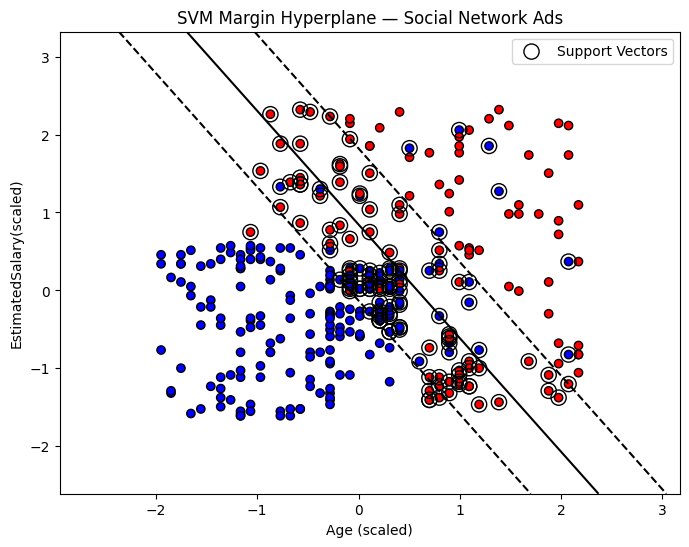

In [10]:

plt.figure(figsize=(8,6))
# Decision boundary (0) and margins (-1, +1)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--','-','--'])

# Plot points
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train, cmap=plt.cm.bwr, edgecolors='k')
# Support vectors
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
            s=120, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel("Age (scaled)")
plt.ylabel("EstimatedSalary(scaled)")
plt.title("SVM Margin Hyperplane — Social Network Ads")
plt.legend()
plt.show()
